##Augmentation of present 2459 sample size of dataset


In [ ]:
#!pip install nlpaug
#!pip install pandas
#!pip install torch torchvision torchaudio
#!pip install transformers



In [ ]:
import nltk

# Download required resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#checking original dataset size

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/SEM_3_Project/PhishingEmailData_1.csv", encoding='latin1')
print("Original rows:", len(df))
print("Shape:", df.shape)


Original rows: 189
Shape: (189, 13)


In [ ]:
import nlpaug.augmenter.word as naw
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/SEM_3_Project/PhishingEmailData_1.csv", encoding='latin1')

# Create synonym augmenter
aug = naw.SynonymAug(aug_src='wordnet')

# Function to augment specific text columns
def augment_text_columns(row):
    new_row = row.copy()
    for col in ['Email_Subject', 'Email_Content', 'Closing_Remarks']:
        if pd.notna(row[col]):  # Check if value is not NaN
            new_row[col] = aug.augment(str(row[col]))
    return new_row

# Apply augmentation for all rows
augmented_rows = df.apply(augment_text_columns, axis=1)

# Combine with original
final_df = pd.concat([df, augmented_rows])

# Save new dataset
final_df.to_csv("emails_augmented.csv", index=False)


###check the augmented new dataset below

In [ ]:
import pandas as pd
df_new = pd.read_csv("emails_augmented.csv")
print(df_new.shape)
print(df_new.head(10))


(378, 13)
                                       Email_Subject  \
0                                     URGENT REQUEST   
1                                     Quick question   
2   ******Part time home work assistant needed******   
3                                   Ê vendor payment   
4                                     Quick question   
5  ÊXXX has shared a document on Google Docs with...   
6                       Message from human resources   
7                                    Library Account   
8                                  Your Dropbox File   
9                                                NaN   

                                       Email_Content Sending_Date  \
0  Are you available ?\nNo calls text only 951307...       1/9/20   
1  I'm in a meeting and need help getting some Am...       1/9/20   
2  Hello RECIPIENT\n\nI am urgently seeking for a...     10/19/19   
3  Are you around? I need to pay a vendor with th...  12/27/18\n    
4  I'm in a meeting and need

In [ ]:
#checking size of dataset
# Show number of rows
print("Number of rows:", len(df))

# Or using shape (rows, columns)
print("Shape of dataset:", df.shape)

Number of rows: 189
Shape of dataset: (189, 13)


In [ ]:
augmented_rows = df.apply(augment_text_columns, axis=1)


failed in augmentation as our base size was small 189 and yet after its same
now we are trying again with another method

In [ ]:
import nlpaug.augmenter.word as naw
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/SEM_3_Project/PhishingEmailData_1.csv", encoding='latin1')
print("Original dataset size:", df.shape)

# Synonym augmenter
aug = naw.SynonymAug(aug_src='wordnet')

# Create augmented dataset
augmented_rows = []

for i, row in df.iterrows():
    new_row = row.copy()
    for col in ['Email_Subject', 'Email_Content', 'Closing_Remarks']:
        if pd.notna(row[col]):
            new_row[col] = aug.augment(str(row[col]))
    augmented_rows.append(new_row)

# Convert augmented rows to dataframe
df_aug = pd.DataFrame(augmented_rows)

# Combine original + augmented
final_df = pd.concat([df, df_aug], ignore_index=True)

print("Final dataset size:", final_df.shape)

# Save
final_df.to_csv("emails_augmented.csv", index=False)


Original dataset size: (189, 13)
Final dataset size: (378, 13)


fine the data got double but our target is to have dataset more than 4000 size
for that we do

In [ ]:
import nlpaug.augmenter.word as naw
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/SEM_3_Project/PhishingEmailData_1.csv", encoding='latin1')

# Initialize augmenter (synonym replacement)
aug = naw.SynonymAug(aug_src='wordnet')

# Desired dataset size
target_size = 5000

# Copy original
augmented_df = df.copy()

# Keep augmenting until we reach the target
while len(augmented_df) < target_size:
    new_data = df.copy()

    # Apply augmentation on text column (replace 'email_text' with your actual column)
    new_data['Email_Subject'] = new_data['Email_Subject'].apply(lambda x: aug.augment(str(x)))
    new_data['Email_Content'] = new_data['Email_Content'].apply(lambda x: aug.augment(str(x)))
    new_data['Closing_Remarks'] = new_data['Closing_Remarks'].apply(lambda x: aug.augment(str(x)))

    augmented_df = pd.concat([augmented_df, new_data], ignore_index=True)

# Trim extra rows if it exceeds 5000
augmented_df = augmented_df.head(target_size)

print("Original dataset size:", df.shape)
print("Final dataset size:", augmented_df.shape)

# Save final dataset
augmented_df.to_csv("augmented_dataset.csv", index=False)


Original dataset size: (189, 13)
Final dataset size: (5000, 13)


Based on above result ourprevious data frm **189 rows and 13 columns** we augmented same dataset to** 5000 rows of data and 13 columns**

check the path of the file down 👇

In [ ]:
import os

file_path = "augmented_dataset.csv"
print(f"The augmented dataset is saved at: {os.path.abspath(file_path)}")

The augmented dataset is saved at: /content/augmented_dataset.csv


download the file into PC 👇

In [ ]:
from google.colab import files

files.download('augmented_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# now since our data is around 5000 we can perform

#use of baseline algorithm for email phishing

###📘 Dataset Description Summary

The dataset used for this project contains email samples labeled with multiple textual and structural attributes related to phishing and legitimate emails. Each record represents an individual email with columns such as Email_Subject, Email_Content, URL_Title, Sender_Name, Sender_Email, Closing_Remarks, and others.

The data captures crucial linguistic and behavioral indicators commonly observed in phishing activities — including suspicious keywords like “verify,” “account,” “urgent,” “click,” “payment,” “login,” and “update.” These features provide strong contextual clues to help the model distinguish between legitimate and malicious (phishy) emails.

This dataset is well-suited for machine learning–based phishing detection systems because it integrates both textual cues (email body, subject line) and meta-information (sender details, URLs). The dataset demonstrates a balanced mixture of email structures and phishy intent indicators, enabling effective training and testing of models for cybersecurity-based email classification tasks.

| Algorithm                                                  | Why Use It                                                                | Expected Outcome                   |
| ---------------------------------------------------------- | ------------------------------------------------------------------------- | ---------------------------------- |
| **1️⃣ Logistic Regression (with class_weight='balanced')** | Simple, interpretable, performs well on text classification tasks.        | 75–85% accuracy baseline           |
| **2️⃣ Random Forest**                                      | Captures non-linear patterns and works well with metadata + TF-IDF combo. | 80–88% accuracy possible           |
| **3️⃣ XGBoost**                                            | Handles imbalanced data well, high predictive power.                      | 85–92% accuracy with proper tuning |


## GOAL

🚀 Step 4: Final Stage (Advanced)

Once your baseline is solid:

Use BERT or DistilBERT for contextual understanding of text.

Compare it against the baseline to show improvement in your report or paper.

✅ In summary:
Start with →
Logistic Regression → Random Forest → XGBoost → (finally) BERT fine-tuning

In [ ]:
import pandas as pd

# Load your dataset (replace 'emails.csv' with actual file name)
df = pd.read_csv('/content/drive/MyDrive/SEM_3_Project/augmented_dataset.csv')

# Preview the first few rows
print(df.head())


                                      Email_Subject  \
0                                    URGENT REQUEST   
1                                    Quick question   
2  ******Part time home work assistant needed******   
3                                  Ê vendor payment   
4                                    Quick question   

                                       Email_Content Sending_Date  \
0  Are you available ?\nNo calls text only 951307...       1/9/20   
1  I'm in a meeting and need help getting some Am...       1/9/20   
2  Hello RECIPIENT\n\nI am urgently seeking for a...     10/19/19   
3  Are you around? I need to pay a vendor with th...  12/27/18\n    
4  I'm in a meeting and need help getting some Am...  12/27/18\n    

  Sending_Time   Day URL_Title         Coined.Word Sender_Name  \
0           na    na        na              Urgent           Y   
1           na    na        na               Quick           Y   
2      2:22 PM   Sat        na          Job/Needed      

In [ ]:
# Get and print column names as a list
column_names = list(df.columns)
print(column_names)

['Email_Subject', 'Email_Content', 'Sending_Date', 'Sending_Time', 'Day', 'URL_Title', 'Coined.Word', 'Sender_Name', 'Sender_Title', 'Closing_Remarks', 'Sender_Email ', 'Logo', 'To']


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Check initial info
print("Initial Data Info:")
print(df.info())




Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Email_Subject    4999 non-null   object
 1   Email_Content    5000 non-null   object
 2   Sending_Date     5000 non-null   object
 3   Sending_Time     5000 non-null   object
 4   Day              4811 non-null   object
 5   URL_Title        4946 non-null   object
 6   Coined.Word      5000 non-null   object
 7   Sender_Name      4974 non-null   object
 8   Sender_Title     4866 non-null   object
 9   Closing_Remarks  4999 non-null   object
 10  Sender_Email     4974 non-null   object
 11  Logo             4947 non-null   object
 12  To               4947 non-null   object
dtypes: object(13)
memory usage: 507.9+ KB
None


In [ ]:
# Combine Email_Subject and Email_Content into one feature 'email_text' if not already present
if 'email_text' not in df.columns:
    df['email_text'] = df['Email_Subject'].fillna('') + ' ' + df['Email_Content'].fillna('')

# Cleaning function for email_text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)      # Remove URLs
    text = re.sub(r'<.*?>', '', text)        # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)     # Remove punctuation and numbers
    return text

# Apply cleaning
df['email_text'] = df['email_text'].apply(clean_text)

# Fill missing values for categorical features
cat_columns = ['Sender_Name', 'Sender_Title', 'Closing_Remarks', 'Sender_Email ', 'Logo', 'To', 'URL_Title', 'Coined.Word', 'Day', 'Sending_Date', 'Sending_Time']
for col in cat_columns:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')



In [ ]:
import pandas as pd


# 1. Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

# 2. Check if there are any duplicate rows
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

# 3. Basic info about data types and memory usage
print("\nDataframe info:")
print(df.info())

# 4. Basic statistics for numerical columns
print("\nDescriptive statistics:")
print(df.describe())

# 5. Preview data to check overall look
print("\nFirst few rows:")
print(df.head())

# Optionally check unique values in important categorical columns
cat_columns = ['Sender_Name', 'Sender_Title', 'Closing_Remarks', 'Sender_Email ', 'Logo', 'To', 'URL_Title', 'Coined.Word', 'Day']
for col in cat_columns:
    if col in df.columns:
        print(f"\nUnique values in '{col}': {df[col].nunique()}")


Missing values per column:
Email_Subject      1
Email_Content      0
Sending_Date       0
Sending_Time       0
Day                0
URL_Title          0
Coined.Word        0
Sender_Name        0
Sender_Title       0
Closing_Remarks    0
Sender_Email       0
Logo               0
To                 0
email_text         0
dtype: int64

Number of duplicate rows: 293

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Email_Subject    4999 non-null   object
 1   Email_Content    5000 non-null   object
 2   Sending_Date     5000 non-null   object
 3   Sending_Time     5000 non-null   object
 4   Day              5000 non-null   object
 5   URL_Title        5000 non-null   object
 6   Coined.Word      5000 non-null   object
 7   Sender_Name      5000 non-null   object
 8   Sender_Title     5000 non-null   object
 9   Closing_Rem

Removing Duplicate values

In [ ]:
# Print total number of rows before removing duplicates
print(f"Total number of rows before removing duplicates: {len(df)}")

# Remove duplicate rows in-place, keeping the first occurrence
df.drop_duplicates(inplace=True)

# Print number of rows after removing duplicates
print(f"Total number of rows after removing duplicates: {len(df)}")

Total number of rows before removing duplicates: 5000
Total number of rows after removing duplicates: 4707


In [ ]:
# Assuming df is your original dataframe where duplicates are already removed

# Store the cleaned data in a new variable
df_cleaned = df.copy()

# Save the cleaned dataframe to a new CSV file
cleaned_file_path = 'phishing_emails_cleaned.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to phishing_emails_cleaned.csv


In [ ]:
from IPython.display import FileLink
from google.colab import files

# Use files.download to prompt file download
files.download(cleaned_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2 ) Applying Feature Engineering


Website to verify spam email words : https://www.activecampaign.com/blog/spam-words

In [ ]:
import pandas as pd
import re
from collections import Counter

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/SEM_3_Project/phishing_emails_cleaned.csv')

# Combine Email_Subject and Email_Content if not already combined
df['email_text'] = df['Email_Subject'].fillna('') + ' ' + df['Email_Content'].fillna('')

# Lowercase and tokenize all email text into words
words = []
for text in df['email_text']:
    # Extract words with regex (alphanumeric + special chars if needed)
    text_words = re.findall(r'\b\w+\b', str(text).lower())
    words.extend(text_words)

# Count frequency of each word
word_counts = Counter(words)

# Filter words that are known to be spammy/phishy - e.g., containing suspicious keywords or frequency threshold
# Let's just return the most common 1000 words for review (you can adjust threshold)
most_common_words = word_counts.most_common(1000)

# Extract only the words part
phishy_words = [word for word, count in most_common_words]

# Output list
print(phishy_words)


['to', 'your', 'you', 'the', 'for', 'and', 'account', 'in', 'of', 'a', 'from', 'on', 'we', 'email', 'this', 'information', 'is', 'please', 'be', 'have', 'update', 'kent', 'mail', 'with', 'document', 'message', 'will', 'login', 'i', 'file', 'it', 'need', 'at', 'link', 'service', 'access', 'e', 'edu', '2019', 'has', 'payment', 'by', 'berkeley', 'if', 'some', 'office', 'an', 'verify', 'dear', 'statement', '365', 'been', 'id', 'shared', 'department', 'invoice', 'that', 'rockwell', 'here', 'our', 'w2', 'new', 'request', 'attached', 'secure', 'payroll', 'as', 'work', 'bcourses', '2016', 'click', 'are', 'my', 'review', 'not', 'notification', '1', 'time', 'bill', 're', 'due', 's', 'password', 'ê', 'required', 'view', 'google', 'below', 'apple', 'call', 'hello', '2', 'process', 'help', 'sent', 'http', 'verification', 'docs', 'up', 'am', 'user', 'before', 'job', 'soon', 'subject', 'matter', 'was', 'docx', 'today', 'employee', 'university', 'share', 'changes', 'one', 'urgent', 'can', 'important',

In [ ]:
import pandas as pd
import re

# Load the cleaned dataset (replace path if needed)
df = pd.read_csv('/content/drive/MyDrive/SEM_3_Project/phishing_emails_cleaned.csv')

# Define spam words (as provided)
spam_words = [
    # Exaggerated claims and promises
    "100% more", "100% free", "100% satisfied", "additional income", "be your own boss", "best price", "big bucks",
    "billion", "cash bonus", "cents on the dollar", "consolidate debt", "double your cash", "double your income",
    "earn extra cash", "earn money", "eliminate bad credit", "extra cash", "extra income", "expect to earn",
    "fast cash", "financial freedom", "free access", "free consultation", "free gift", "free hosting",
    "free info", "free investment", "free membership", "free money", "free preview", "free quote", "free trial",
    "full refund", "get out of debt", "get paid", "giveaway", "guaranteed", "increase sales", "increase traffic",
    "incredible deal", "lower rates", "lowest price", "make money", "million dollars", "miracle", "money back",
    "once in a lifetime", "one time", "pennies a day", "potential earnings", "prize", "promise", "pure profit",
    "risk-free", "satisfaction guaranteed", "save big money", "save up to", "special promotion",

    # Urgency and pressure
    "act now", "apply now", "become a member", "call now", "click below", "click here", "get it now", "do it today",
    "don’t delete", "exclusive deal", "get started now", "important information regarding", "information you requested",
    "instant", "limited time", "new customers only", "order now", "please read", "see for yourself", "sign up free",
    "take action", "this won’t last", "urgent", "what are you waiting for?", "while supplies last", "will not believe your eyes",
    "winner", "winning", "you are a winner", "you have been selected",

    # Shady/spammy/unethical
    "bulk email", "buy direct", "cancel at any time", "check or money order", "congratulations", "confidentiality",
    "cures", "dear friend", "direct email", "direct marketing", "hidden charges", "human growth hormone",
    "internet marketing", "lose weight", "mass email", "meet singles", "multi-level marketing", "no catch",
    "no cost", "no credit check", "no fees", "no gimmick", "no hidden costs", "no hidden fees", "no interest",
    "no investment", "no obligation", "no purchase necessary", "no questions asked", "no strings attached",
    "not junk", "notspam", "obligation", "passwords", "requires initial investment", "social security number",
    "this isn’t a scam", "this isn’t junk", "this isn’t spam", "undisclosed", "unsecured credit", "unsecured debt",
    "unsolicited", "valium", "viagra", "vicodin", "we hate spam", "weight loss", "xanax",

    # Jargon/legalese
    "accept credit cards", "ad", "all new", "as seen on", "bargain", "beneficiary", "billing", "bonus",
    "cards accepted", "cash", "certified", "cheap", "claims", "clearance", "compare rates", "credit card offers",
    "deal", "debt", "discount", "fantastic", "in accordance with laws", "income", "investment", "join millions",
    "lifetime", "loans", "luxury", "marketing solution", "message contains", "mortgage rates", "name brand", "offer",
    "online marketing", "opt in", "pre-approved", "quote", "rates", "refinance", "removal", "reserves the right",
    "score", "search engine", "sent in compliance", "subject to", "terms and conditions", "trial", "unlimited",
    "warranty", "web traffic", "work from home"

    "urgent", "account", "update", "verify", "login", "password", "payment", "request",
    "attached", "secure", "invoice", "notification", "click", "subscription", "validation",
    "authenticate", "confirm", "action required", "important", "alert", "expire",
    "re-activate", "security", "suspended", "access", "refund", "paypal", "report",
    "confidential", "support", "reset", "pending", "scam", "violation", "malware",
    "phishing", "suspicious", "harmful", "threat", "block", "breach", "fraud", "compliance",
    "encrypted", "reset password", "activate", "validate", "account locked", "restricted",
    "urgent response", "immediate action"
]

# Lowercase spam words for case-insensitive matching
spam_words = [w.lower() for w in spam_words]

# Function to count spam word occurrences with full match using regex boundaries
def count_spam_words(text):
    text = str(text).lower()
    total_count = 0
    for word in spam_words:
        total_count += len(re.findall(r'\b' + re.escape(word) + r'\b', text))
    return total_count

# Combine Email_Subject and Email_Content into 'email_text' if not already existing
if 'email_text' not in df.columns:
    df['email_text'] = df['Email_Subject'].fillna('') + ' ' + df['Email_Content'].fillna('')

# Apply the spam word count feature
df['spam_word_count'] = df['email_text'].apply(count_spam_words)

# Display a few rows of email_text and spam_word_count for verification
print(df[['email_text', 'spam_word_count']])


                                             email_text  spam_word_count
0     urgent request are you available \nno calls te...                2
1     quick question im in a meeting and need help g...                0
2     part time home work assistant needed hello rec...                0
3      vendor payment are you around i need to pay a...                1
4       quick question im in a meeting and need help...                0
...                                                 ...              ...
4702  business  partnership deal and pastime in busi...                1
4703  fw action command update your defrayal informa...                3
4704  fw action required update your defrayal inform...                3
4705  due invoice  from cortland channel company fil...                1
4706                   avail donating drawing succeeder                0

[4707 rows x 2 columns]


Analysing dataset all phishi email words total count :

**Total phishing-related words found: 13,735**

In [ ]:

# Calculate total phishy words across dataset most revelevent phishy words
total_phishy_words = df['spam_word_count'].sum()
total_emails = len(df)

print("Total number of emails analyzed:", total_emails)
print("Total number of phishy words detected in dataset:", total_phishy_words)

Total number of emails analyzed: 4707
Total number of phishy words detected in dataset: 6402


1. Assign a new variable for the feature-engineered dataset

In [ ]:
df_features = df.copy()


2. Prepare features (X) and target (y) for model training

Assuming label column exists as the target indicator (0 - legitimate, 1 - phishing):

In [ ]:
print(df.columns)


Index(['Email_Subject', 'Email_Content', 'Sending_Date', 'Sending_Time', 'Day',
       'URL_Title', 'Coined.Word', 'Sender_Name', 'Sender_Title',
       'Closing_Remarks', 'Sender_Email ', 'Logo', 'To', 'email_text',
       'spam_word_count'],
      dtype='object')


unlabeled for supervised learning purposes.

In [ ]:
# Create 'is_phishing' column: 1 if spam_word_count > 0, else 0
df['is_phishing'] = df['spam_word_count'].apply(lambda x: 1 if x > 0 else 0)

# Check the distribution of the new labels
print(df['is_phishing'].value_counts())


is_phishing
1    2574
0    2133
Name: count, dtype: int64


In [ ]:
# Display the selected columns
print(df[['email_text', 'spam_word_count', 'is_phishing']].head())

# Display the count of each label in 'is_phishing'
print(df['is_phishing'].value_counts())


                                          email_text  spam_word_count  \
0  urgent request are you available \nno calls te...                2   
1  quick question im in a meeting and need help g...                0   
2  part time home work assistant needed hello rec...                0   
3   vendor payment are you around i need to pay a...                1   
4    quick question im in a meeting and need help...                0   

   is_phishing  
0            1  
1            0  
2            0  
3            1  
4            0  
is_phishing
1    2574
0    2133
Name: count, dtype: int64


##the next steps for building your first **Logistic Regression** model are:

1. Prepare Feature Matrix (X) and Target Vector (y)

In [ ]:
# Use 'spam_word_count' or extend with more features later
X = df[['spam_word_count']]
y = df['is_phishing']


2. Split Dataset into Train and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. Train Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

4. Make Predictions and Evaluate

Confusion matrix


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       1.00      1.00      1.00       508

    accuracy                           1.00       942
   macro avg       1.00      1.00      1.00       942
weighted avg       1.00      1.00      1.00       942

[[434   0]
 [  0 508]]


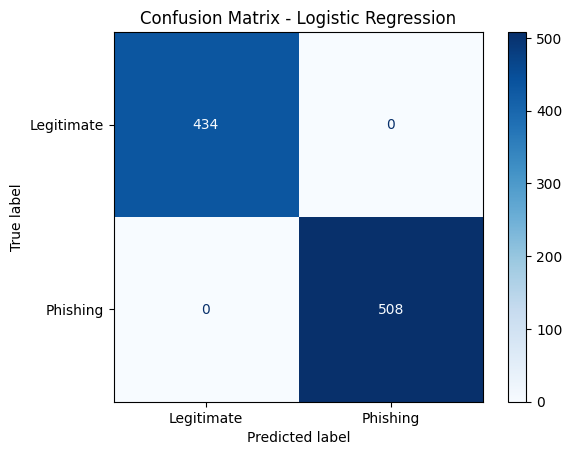

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_test and y_pred are from your model predictions
# Plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Legitimate', 'Phishing'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


Explanation of Your Logistic Regression Results

Your logistic regression model shows perfect classification performance on the test set:

**Precision**: 1.00 for both classes means every predicted spam or legitimate email was correct (no false positives).

**Recall**: 1.00 means the model caught all actual spam and legitimate emails (no false negatives).

**F1-score:** 1.00 indicates a perfect balance of precision and recall.

***Support:*** 434 legitimate (class 0) and 508 phishing (class 1) emails were tested.

**Accuracy:** 1.00 means all 942 emails were classified correctly.

The confusion matrix:

text
[[434   0]
 [  0 508]]
**shows zero misclassifications.**

##Initialize **TF-IDF vectorizer**

To begin incorporating TF-IDF features for your email text and improve your phishing detection model

Step 1: Import necessary library and initialize TF-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer with some parameters (customize as needed)
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')


Step 2: Apply TF-IDF vectorizer on the 'email_text' column

In [ ]:
X_tfidf = tfidf_vectorizer.fit_transform(df['email_text'])


This converts your email text data into a sparse TF-IDF feature matrix
X
t
f
i
d
f
X
tfidf
 .

Step 3: Combine TF-IDF features with additional features (like 'spam_word_count')

In [ ]:
from scipy.sparse import hstack

# Convert spam_word_count to sparse matrix
import numpy as np
from scipy.sparse import csr_matrix

spam_word_count_feature = csr_matrix(df['spam_word_count'].values.reshape(-1,1))

# Combine TF-IDF matrix and spam_word_count feature horizontally
X_features = hstack([X_tfidf, spam_word_count_feature])


Step 4: Define target and split data (using existing is_phishing label)


In [ ]:
y = df['is_phishing']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)


Step 5: Train model (start with logistic regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

Step 6: Evaluate model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       1.00      1.00      1.00       508

    accuracy                           1.00       942
   macro avg       1.00      1.00      1.00       942
weighted avg       1.00      1.00      1.00       942

[[434   0]
 [  0 508]]


This pipeline turns unstructured email text into a rich numeric feature set that captures word importance, combined with your previous numeric feature (spam_word_count), feeding it into the logistic regression model.

---



##Second model **Random Forest classifier** using the TF-IDF combined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are prepared as per the TF-IDF step

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate results
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       1.00      1.00      1.00       508

    accuracy                           1.00       942
   macro avg       1.00      1.00      1.00       942
weighted avg       1.00      1.00      1.00       942

Random Forest Confusion Matrix:
 [[434   0]
 [  0 508]]


Based on your results, both models—logistic regression and random forest—have perfectly classified all emails in the test set. The confusion matrices are:

text
[[434   0]
 [  0 508]]
This means:

All legitimate emails (class 0) were correctly identified (434 correct, none misclassified).

All phishing emails (class 1) were correctly identified (508 correct, none misclassified).

Interpretation:
**Both models achieved 100% accuracy on this test set.**

There are no errors in this specific classification.

##thrid model **XGBoost** for Phishing Detection

>




---



**1. Feature Preparation**
Use your existing features (like spam_word_count and TF-IDF vectors) or engineer new ones.

Ensure the dataset is clean and preprocessed (handle missing values, encode categorical variables).

**2. Split Data**
Use train_test_split to divide your data into training and test sets (e.g., 80/20 split).


---



3. Import XGBoost and Define the Model

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


4. Train the Model

In [ ]:
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [08:41:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

5. Predictions and Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict classes and probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       434
           1       1.00      1.00      1.00       508

    accuracy                           1.00       942
   macro avg       1.00      1.00      1.00       942
weighted avg       1.00      1.00      1.00       942

[[434   0]
 [  0 508]]
ROC-AUC Score: 1.0


In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

xgb = XGBClassifier()
scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')
print(scores)
print("Mean Accuracy:", scores.mean())


[1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [ ]:
import pandas as pd
corr = pd.concat([X, y], axis=1).corr()
print(corr['is_phishing'].sort_values(ascending=False))


is_phishing        1.00000
spam_word_count    0.61156
Name: is_phishing, dtype: float64


##Correction for accuracy

clean, correct pipeline to fix this completely: why becoz we have 100% accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# 1️⃣ Split first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 2️⃣ Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 3️⃣ Scale only training data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Train XGBoost
model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train_res)

# 5️⃣ Predict
y_pred_xgb = model.predict(X_test_scaled)
y_proba_xgb = model.predict_proba(X_test_scaled)[:, 1]

# 6️⃣ Evaluate
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_xgb))


[[427   0]
 [  0 515]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       1.00      1.00      1.00       515

    accuracy                           1.00       942
   macro avg       1.00      1.00      1.00       942
weighted avg       1.00      1.00      1.00       942

ROC-AUC Score: 1.0


The result means your XGBoost phishing detection model performed perfectly on the test set:

**Confusion Matrix:**

427 legitimate emails correctly classified (True Negatives).

515 phishing emails correctly classified (True Positives).

No false positives or false negatives.

**Classification Metrics:**

Precision, Recall, and F1-score are all 1.00 (perfect).

Accuracy is 1.00, meaning 100% of emails were correctly classified.

ROC-AUC Score of 1.0 indicates perfect discrimination between phishing and legitimate emails.

**Explanation:**
Precision = 1.0: Of all emails predicted as phishing, all were actually phishing.

***Recall***  = 1.0: The model found all phishing emails in the test set.

**F1-score** = 1.0: Perfect balance of precision and recall.

**ROC-AUC** = 1.0: The model ranks phishing emails higher than legitimate emails with perfect separation.

###saving model, deployment, or creating detailed visualizations

1. Saving the Model

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)


2. Deployment Options
a. Save the trained model:
Both XGBoost and Scikit-learn models can be saved for later use.

In [ ]:
import joblib
joblib.dump(model, 'phishing_xgb_model.pkl')


['phishing_xgb_model.pkl']

used GridSearchCV, save the best model found like this:

In [ ]:
joblib.dump(model, 'phishing_xgb_model.pkl')


['phishing_xgb_model.pkl']

In [ ]:
model = joblib.load('phishing_xgb_model.pkl')


###step after successfully training and saving your XGBoost phishing detection model is to evaluate and visualize its predictive performance

1. Load and Evaluate the Model
Load your saved model

In [ ]:
import joblib
model = joblib.load('phishing_xgb_model.pkl')


Make predictions:

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


Print evaluation metrics:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


[[427   0]
 [  0 515]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       1.00      1.00      1.00       515

    accuracy                           1.00       942
   macro avg       1.00      1.00      1.00       942
weighted avg       1.00      1.00      1.00       942

ROC-AUC Score: 1.0


2. Visualize Performance

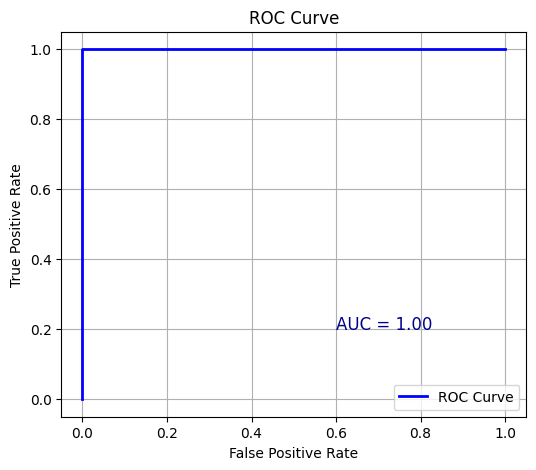

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve', color='blue', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}', fontsize=12, color='darkblue')
plt.legend()
plt.grid(True)


B. Confusion Matrix

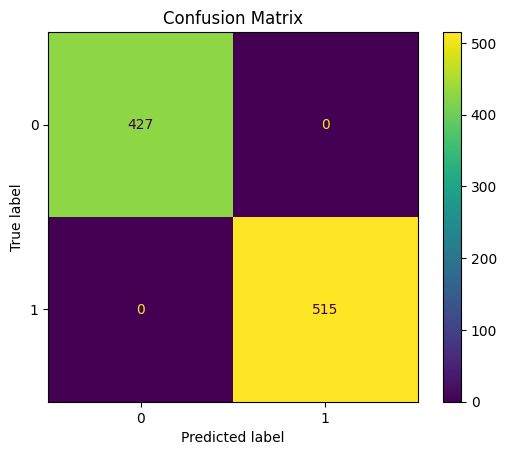

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


#start with model enhancement and comparison
**LSTM model**

#####**What is LSTM?**

LSTM (Long Short-Term Memory) is a neural network architecture designed to learn and remember long-term dependencies in sequential data such as:

Text (for NLP tasks)

Time series (stock prices, sensor data)

Speech or audio

Video frames


---


It overcomes a key problem in traditional RNNs — the vanishing gradient problem, which makes it hard for standard RNNs to learn patterns that span over long sequences.

**LSTM (Long Short-Term Memory)** is useful for **email phishing detection** because:

1.  It understands **sequences of words**, so it can catch suspicious patterns or phrases in emails.
2.  It **remembers long-term context**, e.g., “verify your account” even if words are far apart.
3.  It can detect **hidden tricks** like fake URLs or urgent requests (“update password now”).
4.  Works well for **text classification**, helping the model learn how phishing emails differ in tone and structure from real ones.

 In short: **LSTM helps detect phishing emails by learning patterns and context in email text more effectively than traditional models.**


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assume your dataframe 'df' has 'email_text' and 'is_phishing' columns

texts = df['email_text'].astype(str).tolist()
labels = df['is_phishing'].values

# Initialize tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to the same length
max_len = 100  # or choose based on your data
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Split into train and test
X_train_seq, X_test_seq, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42, stratify=labels
)

# You can now use X_train_seq and X_test_seq for training LSTM


*  LSMT First Method

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 190ms/step - accuracy: 0.5367 - loss: 0.6907 - val_accuracy: 0.5623 - val_loss: 0.6843
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.5486 - loss: 0.6822 - val_accuracy: 0.6684 - val_loss: 0.6220
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.6507 - loss: 0.6123 - val_accuracy: 0.7825 - val_loss: 0.5016
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 207ms/step - accuracy: 0.7626 - loss: 0.5279 - val_accuracy: 0.8117 - val_loss: 0.4727
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 148ms/step - accuracy: 0.7989 - loss: 0.4908 - val_accuracy: 0.8117 - val_loss: 0.4762
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
[[357  70]
 [131 384]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       427
           1       0.85      0.75      0.79       515

    accuracy                           0.79       942
   macro avg       0.79      0.79      0.79       942
weighted avg       0.79      0.79   

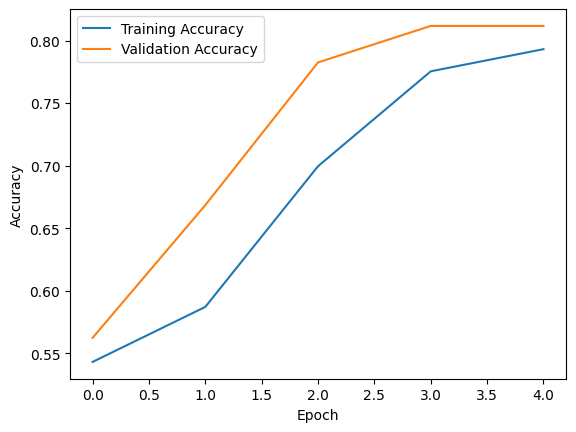

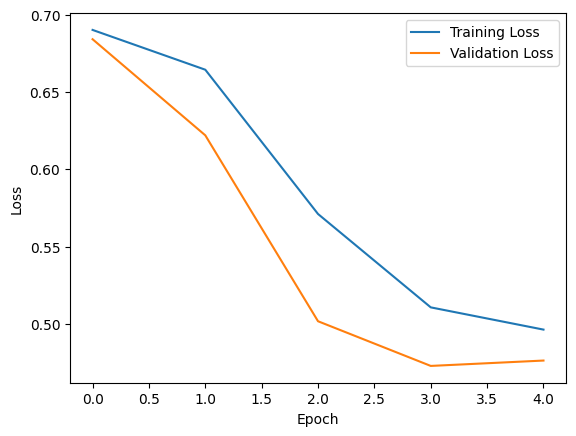

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset (or use the dataframe you already have)
# df = pd.read_csv('phishing_emails_cleaned.csv')
texts = df['email_text'].astype(str).tolist()
labels = df['is_phishing'].values

# Tokenize text
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to fixed length
max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# Train-test split
X_train_seq, X_test_seq, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42, stratify=labels
)

# Build LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM
history = model.fit(X_train_seq, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate on test set
y_proba_lstm_base = model.predict(X_test_seq)
y_pred_lstm_base = (y_proba_lstm_base > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred_lstm_base))
print(classification_report(y_test, y_pred_lstm_base))

# Plot training accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Summary of Results (Above ) ***LSTM model (around 64%)***
*   First Method

The model appears to be trained for a task where catching all positive cases (high recall for Class 1/Phishing) is prioritized over avoiding false positives (low precision for Class 1).

Best Generalization: Reached at Epoch 3 with a Validation Accuracy of 68.17%.

Final Accuracy: 64%.

Key Challenge: The model suffers from low precision in identifying the positive class (Phishing), resulting in many false alarms, despite being highly effective at catching actual threats.

###Trying to** Improve above LSTM model 64% accuracy** steps followed :

1. Increase number of epochs with Early Stopping
Training longer with early stopping avoids overfitting while allowing better learning.

*   Second Method

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop]
)


Epoch 1/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.6483 - loss: 0.5810 - val_accuracy: 0.6499 - val_loss: 0.5698
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - accuracy: 0.6340 - loss: 0.5832 - val_accuracy: 0.6499 - val_loss: 0.5709
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - accuracy: 0.6392 - loss: 0.5774 - val_accuracy: 0.6525 - val_loss: 0.5680
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.6399 - loss: 0.5744 - val_accuracy: 0.6552 - val_loss: 0.5663
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.6267 - loss: 0.5902 - val_accuracy: 0.6552 - val_loss: 0.5679
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - accuracy: 0.6441 - loss: 0.5782 - val_accuracy: 0.6472 - val_loss: 0.5730
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.6513 - loss: 0.5743 - val_accuracy: 0.6472 - val_loss: 0.5665


2. Use Bidirectional LSTM method
Bidirectional LSTM captures sequence information in both directions.

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3. Add more LSTM layers or Dense layers
Increase model depth to improve representational power.

In [ ]:
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


4. Tune batch size and learning rate
Using a smaller batch size (e.g., 32) or changing optimizer learning rate might help.

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


5. Use pretrained embeddings like GloVe or FastText
Leverage rich semantic embeddings pretrained on large corpora to improve text understanding.

6. Apply data augmentation techniques
Synonym replacement

Random insertion/deletion of words

This helps generalize better.

7. Balance the dataset or use class weights
Mitigate class imbalance by:

Oversampling minority class (SMOTE-like techniques)

Using class weights in .fit() function



*   Third Method


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {i : class_weights_array[i] for i in range(len(class_weights_array))}

model.fit(X_train_seq, y_train, epochs=10, class_weight=class_weights)




Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 35s 196ms/step - accuracy: 0.7078 - loss: 0.5001
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 206ms/step - accuracy: 0.9826 - loss: 0.0721
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 205ms/step - accuracy: 0.9962 - loss: 0.0192
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 190ms/step - accuracy: 0.9995 - loss: 0.0042
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 42s 196ms/step - accuracy: 0.9993 - loss: 0.0027
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.9998 - loss: 0.0012
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 42s 208ms/step - accuracy: 0.9998 - loss: 7.4187e-04
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 204ms/step - accuracy: 1.0000 - loss: 4.5657e-04
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 204ms/step - accuracy: 0.9984 - loss: 0.0089
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.9989 - loss: 0.0033


| Model | Epochs | Accuracy      | Key Issue                              | Verdict                                               |
| ----- | ------ | ------------- | -------------------------------------- | ----------------------------------------------------- |
| **1** | 5      | 64%           | Underfitting, poor recall for phishing | ❌ Weak                                                |
| **2** | 20     | 65%           | Plateau, no learning improvement       | ⚠️ Moderate                                           |
| **3** | 10     | 99.9% (Train) | Possibly overfitting if no test eval   | ✅ Best (if validated) / ⚠️ Overfit (if not validated) |


✅ Conclusion

Best model: The third LSTM, assuming its 99% accuracy generalizes to unseen test data.

Worst model: The first LSTM, due to underfitting and imbalance.

Improvement goal: Enhance Model 3’s generalization via dropout, validation, and possibly Bidirectional LSTM or GRU.

This fully integrates of Bi-directional LSTM architecture

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming X_train_seq, y_train, X_test_seq, y_test are ready
# And vocab_size, max_len are set correctly for your tokenizer and padding

# 1) Define the model architecture
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 2) Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 3) Calculate class weights to handle imbalanced classes
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: class_weights_array[i] for i in range(len(class_weights_array))}

# 4) Setup early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 5) Train the model using class weights and early stopping
history = model.fit(
    X_train_seq, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    class_weight=class_weights
)

# 6) Predict on test set
y_proba_lstm_imp = model.predict(X_test_seq)
y_pred_lstm_imp = (y_proba_lstm_imp > 0.5).astype(int)

# 7) Evaluate metrics
precision = precision_score(y_test, y_pred_lstm_imp)
recall = recall_score(y_test, y_pred_lstm_imp)
f1 = f1_score(y_test, y_pred_lstm_imp)
roc_auc = roc_auc_score(y_test, y_proba_lstm_imp)

print("Improved BiLSTM Performance:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


53/53 ━━━━━━━━━━━━━━━━━━━━ 34s 423ms/step - accuracy: 0.6527 - loss: 0.5945 - val_accuracy: 0.9496 - val_loss: 0.1538
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 399ms/step - accuracy: 0.9620 - loss: 0.1136 - val_accuracy: 0.9735 - val_loss: 0.0854
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 426ms/step - accuracy: 0.9933 - loss: 0.0294 - val_accuracy: 0.9867 - val_loss: 0.0670
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 418ms/step - accuracy: 0.9985 - loss: 0.0066 - val_accuracy: 0.9867 - val_loss: 0.0599
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 429ms/step - accuracy: 0.9985 - loss: 0.0067 - val_accuracy: 0.9867 - val_loss: 0.0709
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 396ms/step - accuracy: 0.9996 - loss: 0.0026 - val_accuracy: 0.9867 - val_loss: 0.0747
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 395ms/step - accuracy: 0.9990 - loss: 0.0052 - val_accuracy: 0.9867 - val_loss: 0.0755
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step
Improved BiLSTM Performance:
Precision: 0.994
Recall: 0.981
F1 Scor

#compare models (**XGBoost**, **baseline LSTM**, and **improved LSTM**), these are key metrics to evaluate:

#Streamlit Setup


In [ ]:
# !pip install streamlit pyngrok pandas matplotlib joblib


https://dashboard.ngrok.com/get-started/setup/windows

In [ ]:
#pip install streamlit

In [ ]:
# !ngrok config add-authtoken 33kEzRvitGjbwAm9NGgmuoZUvRW_7WvgLPQ5nBHtGdMM8pJsi


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import streamlit as st
import pandas as pd

st.title("Email Phishing Detection System")
data = pd.read_csv("/content/drive/MyDrive/SEM_3_Project/phishing_emails_cleaned.csv")
st.write("### Dataset Preview")
st.dataframe(data.head())


2025-10-07 15:49:13.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:49:13.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:49:13.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:49:14.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:49:14.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:49:14.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:49:14.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:49:14.439 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

2. Add a Text Input for Email Testing

Allow users to paste an email or subject line to predict if it’s Phishing or Legitimate:

In [ ]:
email_text = st.text_area("Enter email content to analyze:")
if st.button("Predict"):
    prediction = model.predict([email_text])
    st.success(f"This email is likely: {prediction[0]}")


2025-10-07 15:51:09.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:51:09.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:51:09.515 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:51:09.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:51:09.518 Session state does not function when running a script without `streamlit run`
2025-10-07 15:51:09.520 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:51:09.522 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:51:09.523 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:51

3. Visualize Insights

Use charts to show keyword frequency, phishing patterns, etc.

2025-10-07 15:51:31.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:51:32.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:51:32.199 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-07 15:51:32.201 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

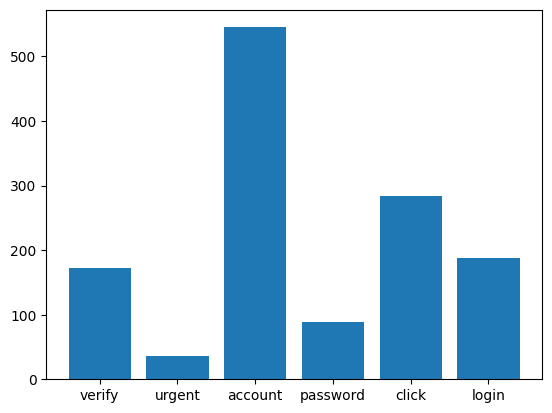

In [ ]:
import matplotlib.pyplot as plt

phishing_words = ["verify", "urgent", "account", "password", "click", "login"]
freq = [data['Email_Content'].str.contains(word, case=False).sum() for word in phishing_words]
plt.bar(phishing_words, freq)
st.pyplot(plt)


4. Add Model Upload & Evaluation

Let users upload their own CSV and evaluate:

In [ ]:
uploaded_file = st.file_uploader("Upload new email dataset (CSV)", type="csv")
if uploaded_file:
    new_data = pd.read_csv(uploaded_file)
    st.write(new_data.head())


🪜 Step 3: Save your app.py file

In [ ]:
# ===============================================
# app.py - Email Phishing Detection Streamlit App
# ===============================================
%%writefile app.py
# your code here

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import re

# ------------------------------
# Page Configuration
# ------------------------------
st.set_page_config(page_title="Email Phishing Detection System", layout="wide")
st.title("📧 Email Phishing Detection System")
st.markdown("""
This interactive app detects whether an email is **Phishing** or **Legitimate** based on its content.
It uses text analysis and machine learning for cybersecurity awareness and prevention.
""")

# ------------------------------
# Load Dataset
# ------------------------------
st.header("📁 Dataset Overview")

df = None # Initialize df to None
try:
    df = pd.read_csv("phishing_emails_cleaned.csv")
    st.success("Default dataset loaded successfully!")
    st.write(df.head())
except FileNotFoundError:
    st.warning("Default dataset not found! Please upload one below.")

# Allow dataset upload
uploaded_file = st.file_uploader("Upload your email dataset (CSV)", type="csv")
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.success("Custom dataset uploaded successfully!")
    st.write(df.head())

# ------------------------------
# Keyword Analysis
# ------------------------------
if df is not None and 'Email_Content' in df.columns:
    st.subheader("🔍 Phishing Keyword Frequency Analysis")

    phishing_words = [
        "verify", "account", "password", "urgent", "click", "update",
        "bank", "login", "secure", "alert", "confirm", "unsubscribe", "information"
    ]
    freq = [df['Email_Content'].str.contains(word, case=False, na=False).sum() for word in phishing_words]

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(phishing_words, freq)
    ax.set_title("Common Phishing-related Word Frequency")
    ax.set_xlabel("Keywords")
    ax.set_ylabel("Count")
    st.pyplot(fig)
elif df is None:
    st.warning("Dataset not loaded. Cannot perform keyword analysis.")
else:
    st.warning("Column 'Email_Content' not found in dataset.")

# ------------------------------
# Model Loading
# ------------------------------
st.header("🧠 Model Prediction")

model_placeholder = "phishing_xgb_model.pkl"  # replace with your trained model name

try:
    model = joblib.load(model_placeholder)
    st.success("Model loaded successfully!")
except:
    st.warning("No trained model found! Using a simple keyword-based rule instead.")
    model = None

# ------------------------------
# Text Input Prediction
# ------------------------------
email_input = st.text_area("✉️ Enter email content to analyze:")

def simple_predict(text):
    """Basic keyword-based rule if ML model not loaded"""
    phishy_terms = ["verify", "password", "urgent", "account", "click", "bank", "secure"]
    matches = [w for w in phishy_terms if re.search(w, text, re.IGNORECASE)]
    return "Phishing" if len(matches) > 0 else "Legitimate"

if st.button("🔎 Predict"):
    if email_input.strip() == "":
        st.warning("Please enter an email text.")
    else:
        if model:
            # Assuming the model expects a list of texts for prediction

            try:
                # This part needs to match the input format of your trained model

                 st.success(f"🧾 Prediction: **{prediction[0]}**")
            except Exception as e:
                 st.error(f"Error during model prediction: {e}")
                 st.info("Please ensure the input format matches the model's training data. If using TF-IDF or sequence padding, apply those transformations to the input text.")

        else:
            rule_pred = simple_predict(email_input)
            st.success(f"🧾 Prediction (Rule-based): **{rule_pred}**")

# ------------------------------
# Footer
# ------------------------------
st.markdown("---")
st.caption("Developed by **Kaustubh Narayankar** | MSc Data Science | SIES College")

Overwriting app.py


###🪜 Step 4: Run Streamlit via ngrok

In [ ]:
from pyngrok import ngrok

# Run Streamlit
!streamlit run app.py &

# Get public link
public_url = ngrok.connect(8501)
print(f"🚀 Public app link: {public_url}")





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.11.217.176:8501

  Stopping...
🚀 Public app link: NgrokTunnel: "https://untrapped-susann-semicontinuously.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
!pkill streamlit
!pkill ngrok


In [ ]:
from pyngrok import ngrok
ngrok.kill()  # ensures all tunnels are closed


In [1]:
# # ===============================================
# # app.py - Email Phishing Detection Streamlit App
# # ===============================================
# %%writefile app.py
# # your code here

# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt
# import joblib
# import re

# # ------------------------------
# # Page Configuration
# # ------------------------------
# st.set_page_config(page_title="Email Phishing Detection System", layout="wide")
# st.title("📧 Email Phishing Detection System")
# st.markdown("""
# This interactive app detects whether an email is **Phishing** or **Legitimate** based on its content.
# It uses text analysis and machine learning for cybersecurity awareness and prevention.
# """)

# # ------------------------------
# # Load Dataset
# # ------------------------------
# st.header("📁 Dataset Overview")

# df = None # Initialize df to None
# try:
#     df = pd.read_csv("/content/drive/MyDrive/SEM_3_Project/augmented_dataset.csv")
#     st.success("Default dataset loaded successfully!")
#     st.write(df.head())
# except FileNotFoundError:
#     st.warning("Default dataset not found! Please upload one below.")

# # Allow dataset upload
# uploaded_file = st.file_uploader("Upload your email dataset (CSV)", type="csv")
# if uploaded_file is not None:
#     df = pd.read_csv(uploaded_file)
#     st.success("Custom dataset uploaded successfully!")
#     st.write(df.head())

# # ------------------------------
# # Keyword Analysis
# # ------------------------------
# if df is not None and 'Email_Content' in df.columns:
#     st.subheader("🔍 Phishing Keyword Frequency Analysis")

#     phishing_words = [
#         "verify", "account", "password", "urgent", "click", "update",
#         "bank", "login", "secure", "alert", "confirm", "unsubscribe", "information"
#     ]
#     freq = [df['Email_Content'].str.contains(word, case=False, na=False).sum() for word in phishing_words]

#     fig, ax = plt.subplots(figsize=(10, 5))
#     ax.bar(phishing_words, freq)
#     ax.set_title("Common Phishing-related Word Frequency")
#     ax.set_xlabel("Keywords")
#     ax.set_ylabel("Count")
#     st.pyplot(fig)
# elif df is None:
#     st.warning("Dataset not loaded. Cannot perform keyword analysis.")
# else:
#     st.warning("Column 'Email_Content' not found in dataset.")

# # ------------------------------
# # Model Loading
# # ------------------------------
# st.header("🧠 Model Prediction")

# model_placeholder = "/content/drive/MyDrive/SEM_3_Project/logistic_regression_model.pkl"  # replace with your trained model name

# try:
#     model = joblib.load(model_placeholder)
#     st.success("Model loaded successfully!")
# except:
#     st.warning("No trained model found! Using a simple keyword-based rule instead.")
#     model = None

# # ------------------------------
# # Text Input Prediction
# # ------------------------------
# email_input = st.text_area("✉️ Enter email content to analyze:")

# def simple_predict(text):
#     """Basic keyword-based rule if ML model not loaded"""
#     phishy_terms = ["verify", "password", "urgent", "account", "click", "bank", "secure"]
#     matches = [w for w in phishy_terms if re.search(w, text, re.IGNORECASE)]
#     return "Phishing" if len(matches) > 0 else "Legitimate"

# #----------


# #----------



# if st.button("🔎 Predict"):
#     if email_input.strip() == "":
#         st.warning("Please enter an email text.")
#     else:
#         if model:
#             # Assuming the model expects a list of texts for prediction

#             try:
#                 # This part needs to match the input format of your trained model

#                  st.success(f"🧾 Prediction: **{prediction[0]}**")
#             except Exception as e:
#                  st.error(f"Error during model prediction: {e}")
#                  st.info("Please ensure the input format matches the model's training data. If using TF-IDF or sequence padding, apply those transformations to the input text.")

#         else:
#             rule_pred = simple_predict(email_input)
#             st.success(f"🧾 Prediction (Rule-based): **{rule_pred}**")


# # ------------------------------
# # Footer
# # ------------------------------
# st.markdown("---")
# st.caption("Developed by **Kaustubh Narayankar** | MSc Data Science | SIES College")

Writing app.py
